# Basic Module


In [ ]:
# 필요한 모듈 임포트
import torch
import torch.nn as nn
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 데이터 불러오기
mnist_train = dset.MNIST(root='./',
                         train=True,
                         transform=transforms.ToTensor(),
                         target_transform=None,
                         download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:00<00:00, 59.2MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.72MB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:00<00:00, 12.8MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 9.80MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
print(mnist_train)

# dataset.__getitem__(idx)
image, label = mnist_train.__getitem__(0)
print(image.size(), label)

# dataset[0]
image, label = mnist_train[0]
print(image.size(), label)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([1, 28, 28]) 5
torch.Size([1, 28, 28]) 5


In [ ]:
# dataset.__len__()
print(mnist_train.__len__())

# len(dataset)
print(len(mnist_train))

60000
60000


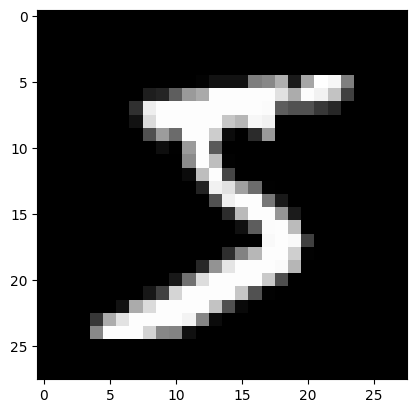

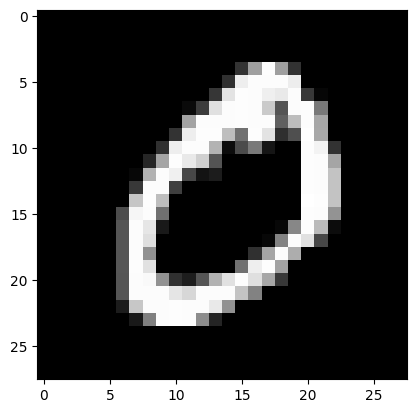

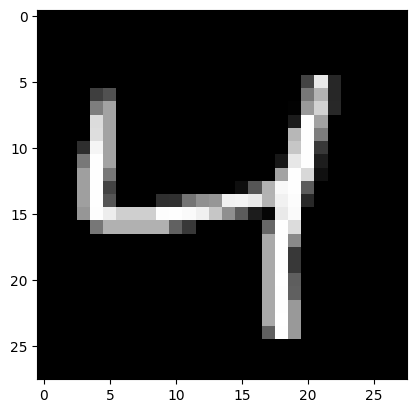

In [ ]:
for i in range(3):
  img = mnist_train[i][0].numpy()
  plt.imshow(img[0], cmap='gray')
  plt.show()

torch.Size([1, 3, 26, 26])


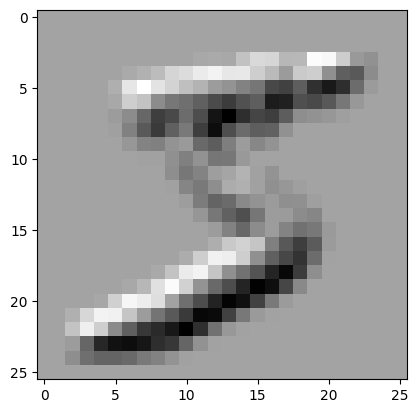

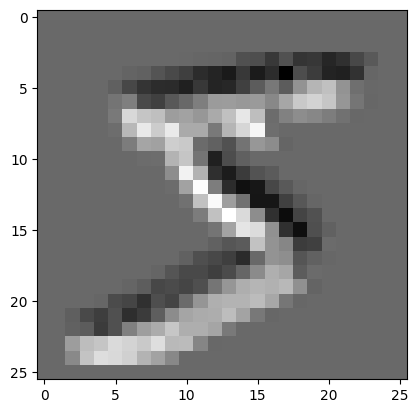

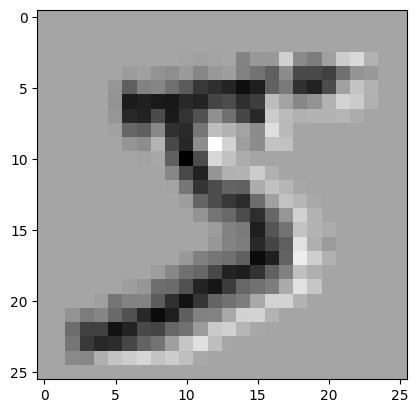

In [ ]:
image, label = mnist_train[0]
image = image.view(-1, image.size(0), image.size(1), image.size(2))

conv_layer = nn.Conv2d(in_channels=1, out_channels=3, kernel_size=3)
output = conv_layer(image)
print(output.size())

for i in range(3):
  plt.imshow(output[0,i,:,:].data.numpy(), cmap='gray')
  plt.show()

# Linear Mnist

In [ ]:
# 모듈 임포트
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
# GPU 사용
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# 하이퍼 파라미터 설정
batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [ ]:
# 데이터 불러오기
mnist_train = dsets.MNIST(root='./',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='./',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 9.91M/9.91M [00:02<00:00, 4.94MB/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 28.9k/28.9k [00:00<00:00, 65.8kB/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 1.65M/1.65M [00:01<00:00, 1.27MB/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.95MB/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
# 데이터셋 확인
print(mnist_train[0][1], len(mnist_train))
print(mnist_test[0][1], len(mnist_test))

5 60000
7 10000


In [ ]:
# 데이터로더
# num_workers
# GPU에서 모델을 학습하는 속도와 CPU에서 DataLoader가 데이터를 준비해주는 속도는 다름.
# 보통 CPU에서 수행되는 속도가 더 느리기 때문에 DataLoader는 멀티프로세싱을 통해 더 빠르게 GPU에 데이터 조달
# 이 때 사용할 멀티프로세스의 수가 num_workers이다.
train_loader = DataLoader(dataset=mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(dataset=mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
# 모델 정의
class Linear(nn.Module):
  def __init__(self):
    super(Linear, self).__init__()
    self.layer = nn.Sequential(
        nn.Linear(784, 300),
        nn.ReLU(),
        nn.Linear(300, 100),
        nn.ReLU(),
        nn.Linear(100, 10),
        nn.ReLU()
    )
  def forward(self, x):
    out = x.view(batch_size, -1)
    out = self.layer(out)
    return out

model = Linear().to(device)

In [ ]:
# 손실 함수와 옵티마이저 설정
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# 학습
for epoch in range(num_epoch):
  for j, [image, label] in enumerate(train_loader):
    x = image.to(device)
    y = label.to(device)

    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output, y)
    loss.backward()
    optimizer.step()

    if j % 1000 == 0:
      print(loss.item())

2.269697904586792
2.2557950019836426
2.3161063194274902
2.2615575790405273
2.281202793121338
2.2829413414001465
2.2572195529937744
2.226724863052368
2.225313425064087
2.190455198287964
2.211977481842041
2.260859966278076
2.227285623550415
2.231930732727051
2.1396310329437256
2.226121187210083
2.1767256259918213
2.095827579498291
2.0373809337615967
2.1269571781158447
1.9277007579803467
1.8802446126937866
2.004438877105713
1.8995493650436401
1.7996894121170044
1.9208228588104248
1.786404013633728
1.9343558549880981
1.9194978475570679
1.797617793083191
1.702441692352295
1.5473960638046265
1.7419103384017944
1.6407058238983154
1.3501484394073486
1.753390908241272
1.4124659299850464
1.658888816833496
1.8475942611694336
1.568249225616455


In [ ]:
# 테스트
total = len(test_loader.dataset)
correct_prediction = 0
acc = 0
model.eval()

with torch.no_grad():
  for image, label in test_loader:
    x = image.to(device)
    y = label.to(device)

    output = model(x)
    prediction = torch.argmax(output, dim=1) == y
    correct_prediction += prediction.float().sum()


print('정확도 : {}'.format(100 * correct_prediction / total))

정확도 : 66.16999816894531


# CNN_naive

In [ ]:
# 모듈 임포트
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


In [ ]:
# 하이퍼 파라미터 설정
batch_size = 16
learning_rate = 0.0002
num_epoch = 10

In [ ]:
# 데이터 불러오기
mnist_train = dsets.MNIST(root='./',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)
mnist_test = dsets.MNIST(root='./',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [ ]:
print(mnist_train[0], len(mnist_train))
print(mnist_test[0], len(mnist_test))

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [ ]:
# 데이터 로더
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
# 모델 정의
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, 5),
        nn.ReLU()
    )
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.layer3 = nn.Sequential(
        nn.Conv2d(32, 64, 5),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
    )
    self.fc1 = nn.Linear(64 * 3 * 3, 100)
    self.layer4 = nn.Sequential(
        self.fc1,
        nn.ReLU()
    )
    self.fc2 = nn.Linear(100, 10)

  def forward(self, x):
    out = self.layer1(x)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.view(out.size(0), -1)
    out = self.layer4(out)
    out = self.fc2(out)
    return out

model = CNN().to(device)

In [ ]:
# 손실함수 및 옵티마이저 설정
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
# 학습
total_batch = len(train_loader)
for epoch in range(num_epoch):
  avg_cost = 0
  for X, Y in train_loader:
    X = X.to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    output = model(X)
    cost = loss_func(output, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('Epoch : {} Cost : {}'.format(epoch + 1, avg_cost))

Epoch : 1 Cost : 0.5126145482063293
Epoch : 2 Cost : 0.41847264766693115
Epoch : 3 Cost : 0.3642660081386566
Epoch : 4 Cost : 0.32516422867774963
Epoch : 5 Cost : 0.29429295659065247
Epoch : 6 Cost : 0.2691478431224823
Epoch : 7 Cost : 0.2475181668996811
Epoch : 8 Cost : 0.23019158840179443
Epoch : 9 Cost : 0.2149035930633545
Epoch : 10 Cost : 0.2015925645828247


In [ ]:
# 테스트
model.eval()
total = len(test_loader.dataset)
correct_prediction = 0
with torch.no_grad():
  for X, Y in test_loader:
    X = X.to(device)
    Y = Y.to(device)

    output = model(X)
    prediction = torch.argmax(output, dim=1) == Y
    correct_prediction += prediction.float().sum()

print('정확도 : {}'.format(100 * correct_prediction / total))

정확도 : 94.68000030517578


# CNN_clean_swish
## swish 활성화 함수 구현

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dset
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.autograd import Function

In [ ]:
class Swish(Function):
  @staticmethod
  def forward(ctx, i):
    result = i * i.sigmoid()
    ctx.save_for_backward(result, i)
    return result

  @staticmethod
  def backward(ctx, grad_output):
    result, i = ctx.saved_tensors
    sigmoid_x = i.sigmoid()
    return grad_output * (result+sigmoid_x*(1-result))

swish = Swish.apply # apply를 사용해서 구현한 활성화 함수 사용

class Swish_module(nn.Module):
  def forward(self, x):
    return swish(x)

swish_layer = Swish_module()

In [ ]:
batch_size = 256
learning_rate = 0.0002
num_epoch = 10

In [ ]:
mnist_train = dset.MNIST("./", train=True, transform=transforms.ToTensor(), target_transform=None, download=True)
mnist_test = dset.MNIST("./", train=False, transform=transforms.ToTensor(), target_transform=None, download=True)

In [ ]:
train_loader = torch.utils.data.DataLoader(mnist_train,batch_size=batch_size, shuffle=True,num_workers=2,drop_last=True)
test_loader = torch.utils.data.DataLoader(mnist_test,batch_size=batch_size, shuffle=False,num_workers=2,drop_last=True)

In [ ]:
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(1, 16, 5),
        #swish_layer,
        nn.SiLU(),
        nn.Conv2d(16, 32, 5),
        #swish_layer,
        nn.SiLU(),
        nn.MaxPool2d(2, 2),
        nn.Conv2d(32, 64, 5),
        #swish_layer,
        nn.SiLU(),
        nn.MaxPool2d(2, 2)
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(64 * 3 * 3, 100),
        #swish_layer,
        nn.SiLU(),
        nn.Linear(100, 10)
    )

  def forward(self, x):
    out = self.layer(x)
    out = out.view(out.size(0), -1)
    out = self.fc_layer(out)
    return out

model = CNN().to(device)

In [ ]:
loss_func = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
total_batch = len(train_loader)
for epoch in range(num_epoch):
  avg_cost = 0
  for X, Y in train_loader:
    X = X.to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    output = model(X)
    cost = loss_func(output, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('[Epoch {}] Cost : {}'.format(epoch + 1, avg_cost))

[Epoch 1] Cost : 0.7501703500747681
[Epoch 2] Cost : 0.1824827343225479
[Epoch 3] Cost : 0.11288297176361084
[Epoch 4] Cost : 0.08292977511882782
[Epoch 5] Cost : 0.06783686578273773
[Epoch 6] Cost : 0.05708396062254906
[Epoch 7] Cost : 0.04874449968338013
[Epoch 8] Cost : 0.043419819325208664
[Epoch 9] Cost : 0.038882020860910416
[Epoch 10] Cost : 0.03486030921339989


In [ ]:
total = len(test_loader.dataset)
correct_prediction = 0

for X, Y in test_loader:
  X = X.cuda()
  Y = Y.cuda()

  output = model(X)
  prediction = torch.argmax(output, dim=1) == Y
  correct_prediction += prediction.float().sum()

print('정확도 : {}'.format(100 * correct_prediction / total))

정확도 : 98.66999816894531


# CNN_CIFAR10

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
# 하이퍼 파라미터 설정
batch_size = 256
learning_rate = 0.0002
num_epoch = 100

In [ ]:
# 데이터 불러오기
cifar_train = dsets.CIFAR10('./', train=True, transform=transforms.ToTensor(), download=True)
cifar_test = dsets.CIFAR10('./', train=False, transform=transforms.ToTensor(), download=True)

100%|██████████| 170M/170M [00:13<00:00, 13.0MB/s]


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified


In [ ]:
# 데이터 확인
print(cifar_train[0][0].size(), len(cifar_train))
print(cifar_test[0][0].size(), len(cifar_test))

torch.Size([3, 32, 32]) 50000
torch.Size([3, 32, 32]) 10000


In [ ]:
# 데이터로더
train_loader = DataLoader(cifar_train, batch_size=batch_size, shuffle=True, num_workers=2, drop_last=True)
test_loader = DataLoader(cifar_test, batch_size=batch_size, shuffle=False, num_workers=2, drop_last=True)

In [ ]:
# 모델 정의
class CNN(nn.Module):
  def __init__(self):
    super(CNN, self).__init__()
    self.layer = nn.Sequential(
        nn.Conv2d(3, 16, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(16, 32, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # 32 x 16 x 16

        nn.Conv2d(32, 64, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(64, 128, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2), # 128 x 8 x 8

        nn.Conv2d(128, 256, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(256, 256, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2) # 256 x 4 x 4
    )
    self.fc_layer = nn.Sequential(
        nn.Linear(256*4*4, 200),
        nn.ReLU(),
        nn.Linear(200, 10)
    )

  def forward(self, x):
    out = self.layer(x)
    out = out.view(out.size(0), -1)
    out = self.fc_layer(out)
    return out

model = CNN().to(device)

In [ ]:
# 손실 함수 및 옵티마이저
criterion = nn.CrossEntropyLoss().to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
# 학습
total_batch = len(train_loader)
for epoch in range(num_epoch):
  avg_cost = 0
  for X, Y in train_loader:
    X = X.to(device)
    Y = Y.to(device)

    optimizer.zero_grad()
    output = model(X)
    cost = criterion(output, Y)
    cost.backward()
    optimizer.step()

    avg_cost += cost / total_batch

  print('[Epoch {:4d}] Cost : {:.6f}'.format(epoch + 1, avg_cost))

[Epoch    1] Cost : 1.941906
[Epoch    2] Cost : 1.545251
[Epoch    3] Cost : 1.421128
[Epoch    4] Cost : 1.332977
[Epoch    5] Cost : 1.267217
[Epoch    6] Cost : 1.208824
[Epoch    7] Cost : 1.159193
[Epoch    8] Cost : 1.092439
[Epoch    9] Cost : 1.051934
[Epoch   10] Cost : 1.008644
[Epoch   11] Cost : 0.973905
[Epoch   12] Cost : 0.926419
[Epoch   13] Cost : 0.889377
[Epoch   14] Cost : 0.849601
[Epoch   15] Cost : 0.818871
[Epoch   16] Cost : 0.784194
[Epoch   17] Cost : 0.753033
[Epoch   18] Cost : 0.719788
[Epoch   19] Cost : 0.690123
[Epoch   20] Cost : 0.653729
[Epoch   21] Cost : 0.626322
[Epoch   22] Cost : 0.591486
[Epoch   23] Cost : 0.565176
[Epoch   24] Cost : 0.529975
[Epoch   25] Cost : 0.494258
[Epoch   26] Cost : 0.464785
[Epoch   27] Cost : 0.434412
[Epoch   28] Cost : 0.402785
[Epoch   29] Cost : 0.364177
[Epoch   30] Cost : 0.330725
[Epoch   31] Cost : 0.304324
[Epoch   32] Cost : 0.278532
[Epoch   33] Cost : 0.243263
[Epoch   34] Cost : 0.213945
[Epoch   35] C

In [ ]:
param_list = list(model.children())
print(param_list)

[Sequential(
  (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU()
  (2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU()
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU()
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU()
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU()
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU()
  (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=4096, out_features=200, bias=True)
  (1): ReLU()
  (2): Linear(in_features=200, out_features=10, bias=True)
)]


In [ ]:
Y = torch.Tensor(cifar_test.targets)
Y.shape

torch.Size([10000])

In [ ]:
# 테스트
total = len(cifar_test)
correct_prediction = 0
with torch.no_grad():
  X = torch.Tensor(cifar_test.data.reshape(total, 3, 32, 32, )).to(device)
  Y = torch.Tensor(cifar_test.targets).to(device)

  output = model(X)
  prediction = torch.argmax(output, dim=1) == Y
  correct_prediction = prediction.float().mean()

print('정확도 : {}'.format(100 * correct_prediction ))

정확도 : 10.1899995803833
